In [1]:
import numpy as np
# from skimage import io
# import pandas as pd
# import pickle
import os
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
# import math
# import time
# import ckwrap

In [2]:
import ckwrap

In [3]:
path = './demo.png'

In [4]:
def image_show(arr):
    plt.imshow(arr, cmap='gray')
    plt.show

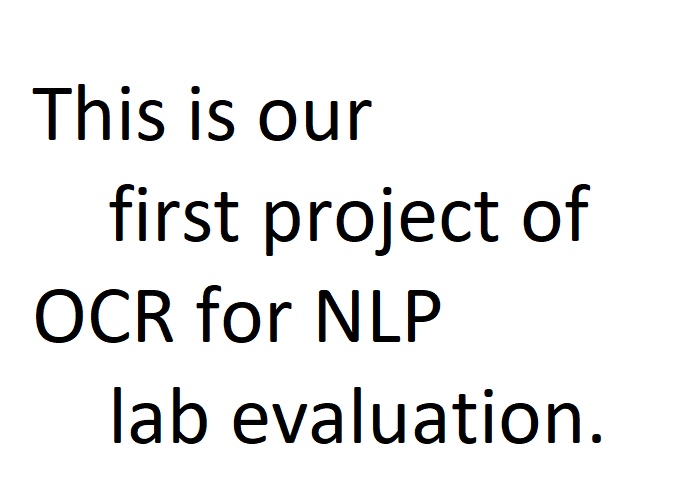

In [5]:
img = Image.open(path)
img

In [19]:
def add_margin(pil_img, top, right, bottom, left, color):  ########
    width, height = pil_img.size
    new_width = width + right + left
    new_height = height + top + bottom
    # print(pil_img.mode)
    result = Image.new('L', (new_width, new_height), color)
    result.paste(pil_img, (left, top))
    # img = ImageOps.grayscale(result)
    # image_arr = np.asarray(result)
    # image_show(image_arr)
    # image_arr.shape, image_arr
    return result


In [20]:
img = add_margin(img, 10, 10, 10, 10, 255)
# img = add_margin(img, 10, 10, 10, 10, 255)
# img

In [21]:
img = ImageOps.grayscale(img)
image_arr = np.asarray(img)
image_arr.shape, image_arr

((528, 713),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8))

In [22]:
def black_and_white(a): #######
    m = a.copy()
    for i in range(len(m)):
        for j in range(len(m[0])):
            if m[i][j] > 200:
                m[i][j] = 255
            else:
                m[i][j] = 0
    return m

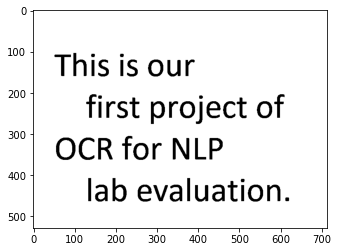

In [23]:
image_arr = black_and_white(image_arr)
image_show(image_arr)

In [24]:
sum = []
for i in range(len(image_arr[0])):
    t = 0
    for j in range(len(image_arr)):
        t += ((image_arr[j][i])/255)
    sum.append(t)
sum = np.diff(388 - np.array(sum))
sum

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   4.,   2.,   0.,   0.,
        17.,   8.,   5.,   4.,   3.,   2.,   2.,   2., -15.,  -5.,  -3.,
        -2.,  44.,   0.,  -1.,  -1.,   0.,   0.,   0.,  -1., -47.,   0.,
         0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   2.,
         0.,   1.,   1.,  -4.,   4.,   5.,  14.,  -2.,  -2.,  54.,  -4.,
        -4.,  -5.,  -8., -16.,   0., -49.,   0.,   0.,  -1.,   0.,   1.,
        16.,   6.,   6.,   4.,   4.,   2.,   2.,   3., -13.,  -4.,  -3.,
         2.,  25.,  -2.,  -2.,  -3.,   0.,  -3.,  -1., -26.,  -2.,   0.,
         0.,  56.,   0.,  44.,   2.,   4.,   0.,  -1., -49.,  43., -41.,
        -2.,  -1.,   2.,  -2.,  -2., -54.,  -4.,   

In [12]:
import seaborn as sns

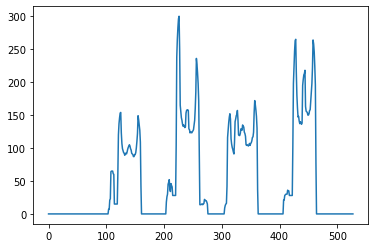

In [25]:
# from matplotlib import pyplot, transforms
# base = pyplot.gca().transData
# rot = transforms.Affine2D().rotate_deg(-90)
horizontal_hist = image_arr.shape[1] - np.sum(image_arr,axis=1,keepdims=True)/255
plt.plot(horizontal_hist)
plt.show()

In [28]:
# first_line= Image.open('./lines/line1.png')
# first_line = add_margin(first_line, 10, 10, 10, 10, 255)
# first_line = ImageOps.grayscale(first_line)
# first_line_arr = np.asarray(first_line)
# first_line_arr = black_and_white(first_line_arr)
# image_show(first_line_arr)


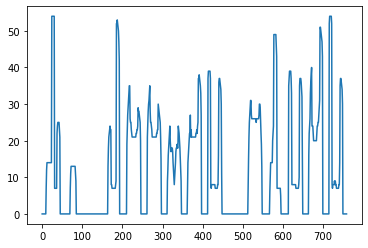

In [29]:
vertical_hist = first_line_arr.shape[0] - np.sum(first_line_arr, axis=0, keepdims=True)/255
vertical_hist = vertical_hist.reshape(-1, 1)
plt.plot(vertical_hist)
plt.show()
# vertical_hist =  vertical_hist.reshape(-1, 1)

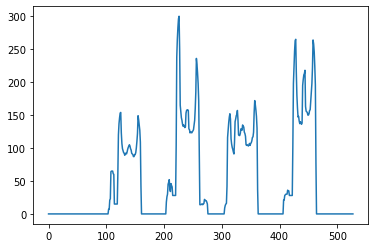

In [30]:
horizontal_hist = image_arr.shape[1] - np.sum(image_arr,axis=1,keepdims=True)/255
plt.plot(horizontal_hist)
plt.show()

In [32]:
vertical_hist = img.shape[0] - np.sum(img,axis=0,keepdims=True)/255

AttributeError: shape

In [ ]:
image_arr.shape

(380, 884)

In [33]:
def line_coords(coords):
    xmin = coords[0][0][0]
    xmax = coords[-1][0][0]
    ymin = 20000
    ymax = 0
    # print(coords)
    for i in coords:
        for j in i:
            if j[1] > ymax:
                ymax = j[1]
            if j[1] < ymin:
                ymin = j[1]
    return [xmin, xmax, ymin, ymax]

In [34]:
coords = []
xycoords = []

for i in range(len(image_arr)):
    # print(i)
    coo = []
    flag = 0
    for c in image_arr[i]:
        if c == 0:
            flag = 1
            break
    if flag == 1:
        for b in range(len(image_arr[i]) - 1):
        # for b in range(len(image_arr[0:, 0:][i])):
            if image_arr[i][b] == 255:
                
                if image_arr[i][b+1] == 0:
                    # print([i, b+1])
                    coo.append([i, b+1])

                # try:
                #     if image_arr[i][b+1] == 0:
                #         coo.append([i, b+1])

                # except:
                #     pass
            
            if image_arr[i][b] == 0:
                # try:
                if image_arr[i][b+1] == 255:
                    # print([i, b+1])
                    coo.append([i, b])
                
                # try:
                #     if image_arr[i][b+1] == 255:
                #         coo.append([i, b])
                # except:
                #     pass

            # print(i)
    else:
        if len(coords) > 0:
            xycoords.append(line_coords(coords))
            coords = []
    if len(coo) > 0:
        coords.append(coo)


In [35]:
xycoords

[[104, 160, 52, 391],
 [204, 275, 129, 609],
 [305, 362, 56, 459],
 [407, 463, 134, 620]]

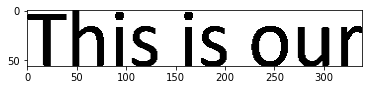

In [36]:
image_show(image_arr[xycoords[0][0]: xycoords[0][1], xycoords[0][2]:xycoords[0][3]])

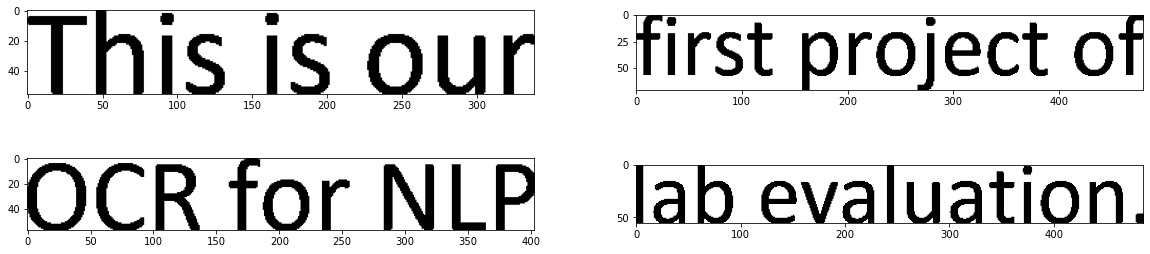

In [37]:
fig = plt.figure(figsize=(20, 10))
rows = len(xycoords)
for i in range(rows):
    fig.add_subplot(rows, 2, i + 1)
    image_show(image_arr[xycoords[i][0]: xycoords[i][1], xycoords[i][2]:xycoords[i][3]])    

In [38]:
xycoords[0]

[104, 160, 52, 391]

In [39]:
first_line = image_arr[xycoords[0][0]: xycoords[0][1], xycoords[0][2]:xycoords[0][3]]

In [40]:
first_line.shape

(56, 339)

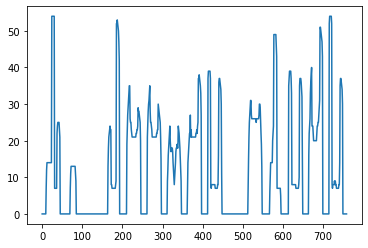

In [41]:

# vertical_hist = img.shape[0] - np.sum(img,axis=0,keepdims=True)/255
plt.plot(vertical_hist)
plt.show()

In [43]:
avg_height = 0
for i in xycoords:
    avg_height += (i[1] - i[0])
avg_height = avg_height/len(xycoords)
min_height = avg_height/3

In [44]:
rows = len(xycoords)
line_path = './lines/'
if not os.path.isdir(line_path):
    os.makedirs(line_path)
for i in range(rows):
    Image.fromarray(image_arr[xycoords[i][0]: xycoords[i][1], xycoords[i][2]:xycoords[i][3]]).save(line_path +'line'+ str(i+1) + '.png')


In [45]:
# spaces = np.array([0])
word_path = './words/'
if not os.path.isdir(word_path):
    os.makedirs(word_path)

spaces = []
letters = []

word_sp = []
words = []
for y in xycoords:
    sp = []
    lt = []
    sp_ctr = 0
    lt_ctr = 0
    a = image_arr[y[0]:y[1], y[2]:y[3]]
    for i in range(len(a[0, :])):
        f = 0
        for j in range(len(a[:, i])):
            if a[j, i] == 0:  #black pixel detected, thus not space
                lt_ctr += 1
                f = 1
                if sp_ctr != 0:
                    sp.append(sp_ctr)
                    sp_ctr = 0
                break
        
        if f != 1:
            sp_ctr += 1
            if lt_ctr != 0:
                lt.append(lt_ctr)
                lt_ctr = 0
    lt.append(lt_ctr)
    sp_labels = ckwrap.ckmeans(sp, 2).labels
    min_sp = np.max(np.array(sp)[[i for i, x in enumerate(sp_labels) if x == 0]])
    # min_sp = (np.sum(sp)/len(sp)) + np.min(sp)

    word_sp.append(min_sp)
    spaces.append(sp)
    letters.append(lt)
    # print(np.sum(sp)/len(sp))
    # print(min_sp)
    
    line_wrds = []
    x_min = y[0]
    x_max = y[1]
    y_min = 0
    y_max = 0
    for i in range(len(sp)):
        if sp[i] <= min_sp:
            y_max += lt[i] + sp[i]
        else:
            y_max += lt[i]
            line_wrds.append([x_min, x_max, y_min+y[2], y_max+y[2]])
            Image.fromarray(image_arr[x_min:x_max, y_min+y[2]:y_max+y[2]]).save(word_path + 'line' + str(len(words) + 1) + '_word' + str(len(line_wrds)) + '.png')
            y_min = y_max + sp[i]
            y_max = y_min
            
    # if sp[-1] <= min_sp:
    y_max += lt[-1]
    line_wrds.append([x_min, x_max, y_min+y[2], y_max+y[2]])
    Image.fromarray(image_arr[x_min:x_max, y_min+y[2]:y_max+y[2]]).save(word_path + 'line' + str(len(words) + 1) + '_word' + str(len(line_wrds)) + '.png')
    words.append(line_wrds)
    
    

for i in spaces:
    print(i)
# for i in letters:
#     print(i)
    

[6, 11, 8, 27, 8, 25, 10, 12]
[4, 11, 4, 4, 28, 10, 4, 2, 9, 6, 3, 25, 5]
[8, 9, 23, 2, 10, 27, 14, 8]
[9, 12, 27, 4, 4, 12, 12, 9, 7, 8, 8, 10, 12]


In [46]:
words

[[[104, 160, 52, 184], [104, 160, 211, 254], [104, 160, 279, 391]],
 [[204, 275, 129, 258], [204, 275, 286, 518], [204, 275, 543, 609]],
 [[305, 362, 56, 193], [305, 362, 216, 312], [305, 362, 339, 459]],
 [[407, 463, 134, 227], [407, 463, 254, 620]]]

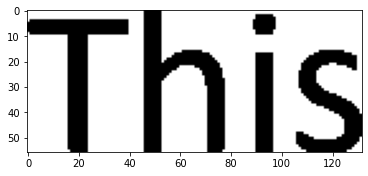

In [47]:
image_show(image_arr[words[0][0][0]: words[0][0][1], words[0][0][2]:words[0][0][3]])

In [48]:
words

[[[104, 160, 52, 184], [104, 160, 211, 254], [104, 160, 279, 391]],
 [[204, 275, 129, 258], [204, 275, 286, 518], [204, 275, 543, 609]],
 [[305, 362, 56, 193], [305, 362, 216, 312], [305, 362, 339, 459]],
 [[407, 463, 134, 227], [407, 463, 254, 620]]]

In [49]:
# for line in words:
#     for word in line:
#         print(word)

In [50]:
letters = []
for line in words:
    li = []
    for word in line:
        wd = []
        a = image_arr[word[0]:word[1], word[2]:word[3]]
        lt_ctr = 0
        sp_ctr = 0
        x_min = word[0]
        x_max = word[1]
        y_min = word[2]
        y_max = 0
        # print(x_min, x_max, y_min, y_max)
        for i in range(len(a[0, :])):
            f = 0
            for j in range(len(a[:, i])):
                if a[j][i] == 0:
                    f = 1
                    lt_ctr += 1
                    if sp_ctr != 0:
                        y_min = y_max + sp_ctr
                        sp_ctr = 0
                    break
            if f != 1:
                sp_ctr += 1
                if lt_ctr != 0:
                    y_max = y_min + lt_ctr
                    lt_ctr = 0 
                    wd.append([x_min, x_max, y_min, y_max])

        y_max = y_min + lt_ctr
        wd.append([x_min, x_max, y_min, y_max])               
        li.append(wd)
        
    letters.append(li)

            

    

In [67]:
print(len(letters[0][0]))

4


In [52]:
letters

[[[[104, 160, 52, 92],
   [104, 160, 98, 130],
   [104, 160, 141, 150],
   [104, 160, 158, 184]],
  [[104, 160, 211, 220], [104, 160, 228, 254]],
  [[104, 160, 279, 316], [104, 160, 326, 358], [104, 160, 370, 391]]],
 [[[204, 275, 129, 154],
   [204, 275, 158, 167],
   [204, 275, 178, 200],
   [204, 275, 204, 230],
   [204, 275, 234, 258]],
  [[204, 275, 286, 320],
   [204, 275, 330, 352],
   [204, 275, 356, 393],
   [204, 275, 395, 412],
   [204, 275, 421, 455],
   [204, 275, 461, 491],
   [204, 275, 494, 518]],
  [[204, 275, 543, 580], [204, 275, 585, 609]]],
 [[[305, 362, 56, 103], [305, 362, 111, 149], [305, 362, 158, 193]],
  [[305, 362, 216, 241], [305, 362, 243, 280], [305, 362, 290, 312]],
  [[305, 362, 339, 379], [305, 362, 393, 420], [305, 362, 428, 459]]],
 [[[407, 463, 134, 141], [407, 463, 150, 181], [407, 463, 193, 227]],
  [[407, 463, 254, 288],
   [407, 463, 292, 327],
   [407, 463, 331, 362],
   [407, 463, 374, 381],
   [407, 463, 393, 425],
   [407, 463, 434, 465],
  

In [53]:
def border_rm(a):
    x_max = 0
    x_min = 10000
    for j in range(len(a[0])):
        for i in range(len(a)):
            if a[i][j] == 0:
                x_min = min(x_min, i)
                break
    for j in range(len(a[0])):
        for i in range(len(a) - 1, 0, -1):
            if a[i][j] == 0:
                x_max = max(x_max, i)
                break

    a = a[x_min:x_max, 0:len(a[0])-1]
    return a, x_max, x_min


In [57]:
m = load_model('./d_model_3_100_A1_a.h5', compile=False)

In [58]:
labs = {
    0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9',
    10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z',
    36: 'a', 37: 'b', 38: 'c', 39: 'd', 40: 'e', 41: 'f', 42: 'g', 43: 'h', 44: 'i', 45: 'j', 46: 'k', 47: 'l', 48: 'm', 49: 'n', 50: 'o', 51: 'p', 52: 'q', 53: 'r', 54: 's', 55: 't', 56: 'u', 57: 'v', 58: 'w', 59: 'x', 60: 'y', 61: 'z'
}


In [59]:
final_text = ''
for line in letters:
    for word in line:
        for letter in word:
            a = image_arr[letter[0]:letter[1], letter[2]:letter[3]]
            a, t, b = border_rm(a)
            if t - b < min_height:
                final_text += '.'
                continue
            # print(len(a))
            # image_show(a)
            res_img = Image.fromarray(a, mode='L')
            res_img = add_margin(res_img, 10, 10, 10, 10, 255)
            res_img = res_img.resize((32, 32))
            a = np.asarray(res_img)/255
            ans = labs[np.argmax(m.predict([a.reshape(32, 32, 1).tolist()], verbose=False))]
            # print(ans)
            final_text += ans
        final_text += ' '
    final_text += '\n'
print(final_text)


This is Our 
first prOaeCt Of 
oGR fOr NLP 
lab evaluatiOn. 



In [116]:
letters_coords = xycoords

In [61]:
import ckwrap

In [62]:
spaces

[[6, 11, 8, 27, 8, 25, 10, 12],
 [4, 11, 4, 4, 28, 10, 4, 2, 9, 6, 3, 25, 5],
 [8, 9, 23, 2, 10, 27, 14, 8],
 [9, 12, 27, 4, 4, 12, 12, 9, 7, 8, 8, 10, 12]]

In [63]:
km = ckwrap.ckmeans(spaces[1], 2)
print(km.labels)

[0 0 0 0 1 0 0 0 0 0 0 1 0]


In [64]:
np.min([spaces[1] == 1])

False

In [65]:
a = np.array(spaces[1])
np.max(a[[i for i, x in enumerate(km.labels) if x == 0]])


11

In [66]:
np.max(np.array(spaces[1])[[i for i, x in enumerate(km.labels) if x == 0 ]])

11